In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/cleveland2.csv
/kaggle/input/heart-disease-dataset/cleveland1.csv
/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/Dataset Heart Disease.csv')

In [3]:
df.head(10)

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
5,5,39,1,3,120,339.0,0,0,170,0,0.0,1,0
6,6,45,0,2,130,237.0,0,0,170,0,0.0,1,0
7,7,54,1,2,110,208.0,0,0,142,0,0.0,1,0
8,8,37,1,4,140,207.0,0,0,130,1,1.5,2,1
9,9,48,0,2,120,284.0,0,0,120,0,0.0,1,0


In [4]:
df.tail(10)

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1038,292,55,0,2,135,250.0,0,0,161,0,1.4,1,1
1039,293,39,1,1,118,219.0,0,1,140,0,1.2,1,0
1040,294,60,0,3,120,178.0,1,1,96,0,0.0,2,1
1041,295,52,1,1,108,233.0,1,1,147,0,0.1,2,1
1042,296,64,1,3,140,335.0,0,1,158,0,0.0,2,0
1043,297,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,298,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,299,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,300,59,1,4,160,273.0,0,0,125,0,0.0,2,0
1047,301,54,1,1,120,188.0,0,1,113,0,1.4,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


Data Cleaning

In [8]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

In [9]:
missing_values_count

Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


In [15]:
# Remove duplicate rows based on all columns
df_unique = df.drop_duplicates()

print(df_unique)

      age  sex  chest pain type  resting bps  cholesterol  \
0      40    1                2          140        289.0   
1      49    0                3          160        180.0   
2      37    1                2          130        283.0   
3      48    0                4          138        214.0   
4      54    1                3          150        195.0   
...   ...  ...              ...          ...          ...   
1043   68    0                3          120        211.0   
1044   44    0                3          108        141.0   
1045   52    1                1          128        255.0   
1046   59    1                4          160        273.0   
1047   54    1                1          120        188.0   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1    

In [16]:
df_unique

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289.0,0,0,172,0,0.0,1,0
1,49,0,3,160,180.0,0,0,156,0,1.0,2,1
2,37,1,2,130,283.0,0,1,98,0,0.0,1,0
3,48,0,4,138,214.0,0,0,108,1,1.5,2,1
4,54,1,3,150,195.0,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,68,0,3,120,211.0,0,0,115,0,1.5,1,1
1044,44,0,3,108,141.0,0,1,175,0,0.6,1,1
1045,52,1,1,128,255.0,0,1,161,1,0.0,2,0
1046,59,1,4,160,273.0,0,0,125,0,0.0,2,0


Summary Statistic

In [17]:
df_unique.describe()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [18]:
df_unique.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [19]:
df_unique['age'].value_counts()

age
54    63
58    55
57    48
52    43
55    43
59    40
56    39
51    38
62    36
48    36
60    33
41    32
53    31
44    30
46    29
43    28
50    28
63    28
61    27
64    27
45    25
49    25
42    24
65    24
67    22
47    20
39    19
66    17
40    14
35    14
37    13
38    12
69    12
68    11
70     9
71     8
34     8
74     6
36     5
29     4
32     4
77     3
72     3
75     3
76     3
33     2
31     2
28     1
30     1
Name: count, dtype: int64

In [20]:
df_unique['sex'].value_counts()

sex
1    770
0    278
Name: count, dtype: int64

In [21]:
df_unique['chest pain type'].value_counts()

chest pain type
4    393
3    255
2    216
1    184
Name: count, dtype: int64

In [23]:
df_unique['cholesterol'].value_counts()

cholesterol
254.0    16
204.0    15
211.0    13
197.0    13
223.0    13
         ..
412.0     1
384.0     1
458.0     1
316.0     1
110.0     1
Name: count, Length: 221, dtype: int64

In [24]:
df_unique['max heart rate'].value_counts()

max heart rate
150    46
140    43
160    33
130    31
125    24
       ..
87      1
93      1
91      1
73      1
80      1
Name: count, Length: 109, dtype: int64

In [25]:
df_unique['target'].value_counts()

target
0    528
1    520
Name: count, dtype: int64

Data Visualization For 10 First Rows

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_unique.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

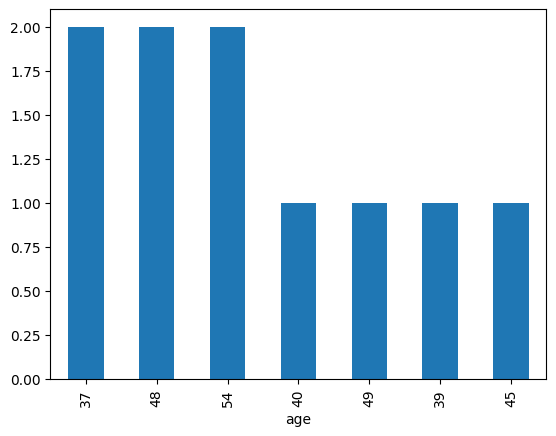

In [34]:
# barchart of age

df['age'].head(10).value_counts().plot(kind='bar')
plt.show()

In this bar chart, Ages at 37, 48 and 54 is the most persons that have heart diseases

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

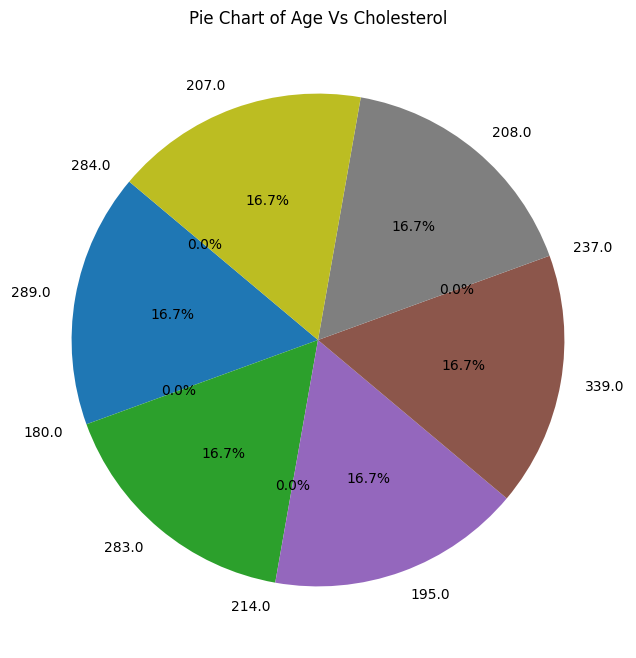

In [40]:
# piechart of sex vs cholesterol

# Select the first 10 rows
df_top10 = df_unique.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['sex'], labels=df_top10['cholesterol'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Age Vs Cholesterol')
plt.show()

Sex 1 has a higher cholesterol level than Sex 0 . That means the major risk factors for heart disease is cholesterol

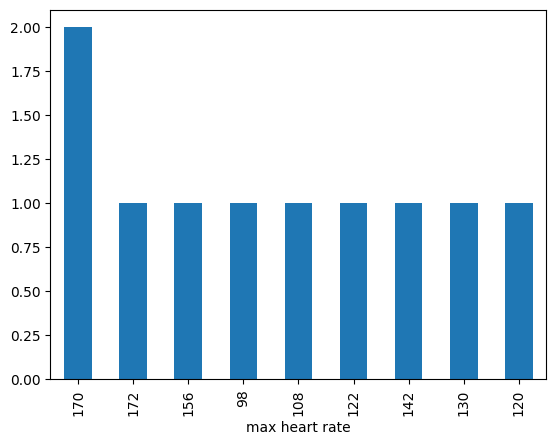

In [41]:
df['max heart rate'].head(10).value_counts().plot(kind='bar')
plt.show()

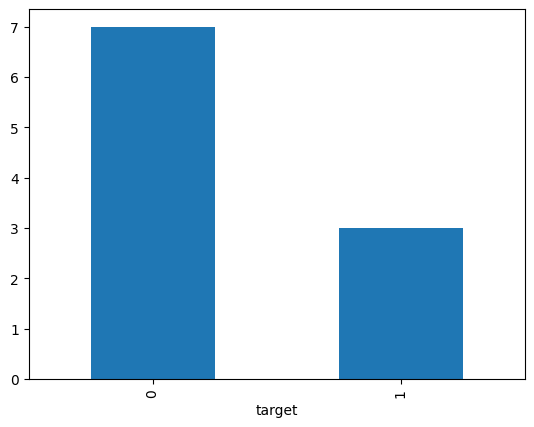

In [44]:
# barchart of age

df['target'].head(10).value_counts().plot(kind='bar')
plt.show()

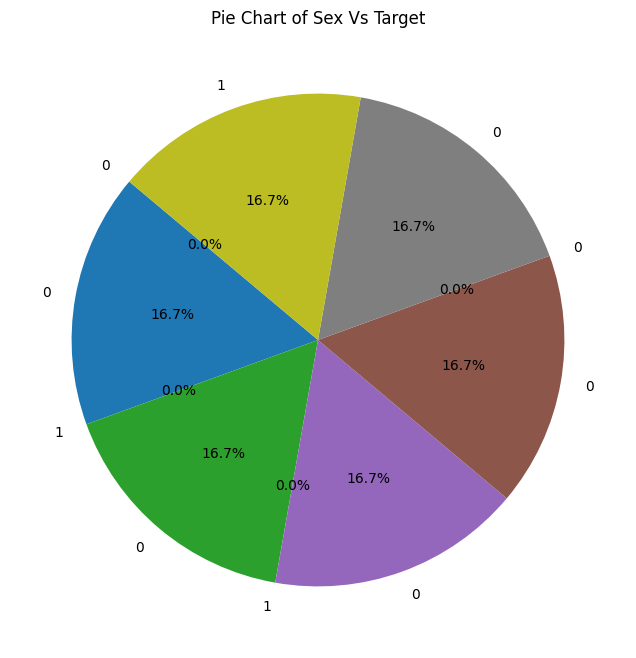

In [43]:
# Select the first 10 rows
df_top10 = df_unique.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['sex'], labels=df_top10['target'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Sex Vs Target')
plt.show()

Predict models for diagnosing heart disease

In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-03-24 00:17:13.174693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 00:17:13.174881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 00:17:13.354960: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [47]:
df_unique.columns

Index(['age', 'sex', 'chest pain type', 'resting bps', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [54]:
# Preprocessing (you'll need to adapt based on your EDA)
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model building
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy) 

Accuracy: 0.7595419847328244


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The model was able to correctly classify 75.95% in heart diseases testing dataset.

In [62]:
# Select relevant features
features = ['age', 'sex', 'cholesterol', 'max heart rate', 'chest pain type']
X = df_unique[features]
y = df_unique['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) 

# Model creation
model = RandomForestClassifier(n_estimators=100) 

# Model training
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred, average='weighted')) 

Accuracy: 0.6142857142857143
F1-score: 0.614250725689405


Accuracy: Out of 100 new heart disease cases, the model would likely correctly classify around 61 patients.

The relationship between different variables and heart disease

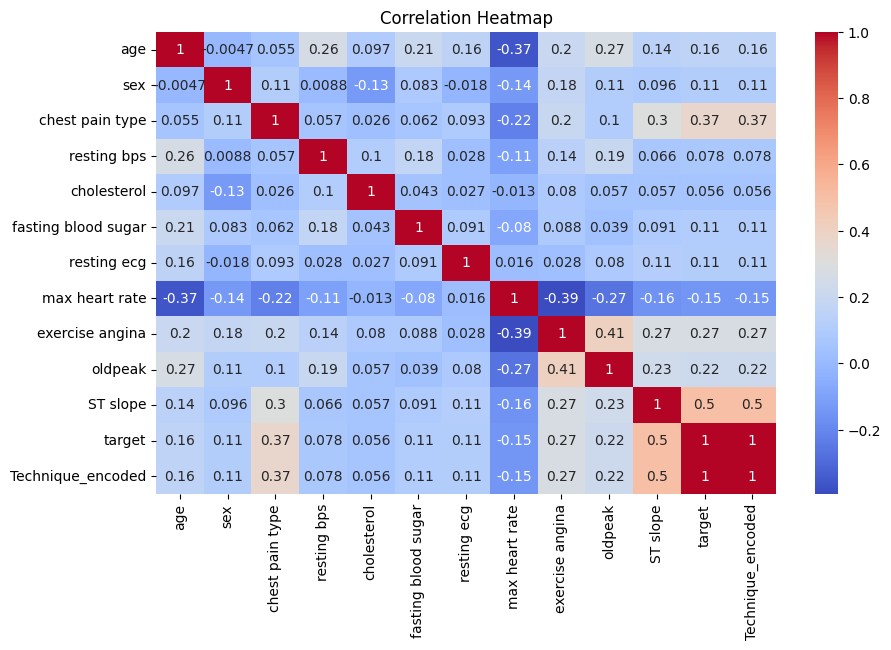

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlation_matrix = df_unique.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

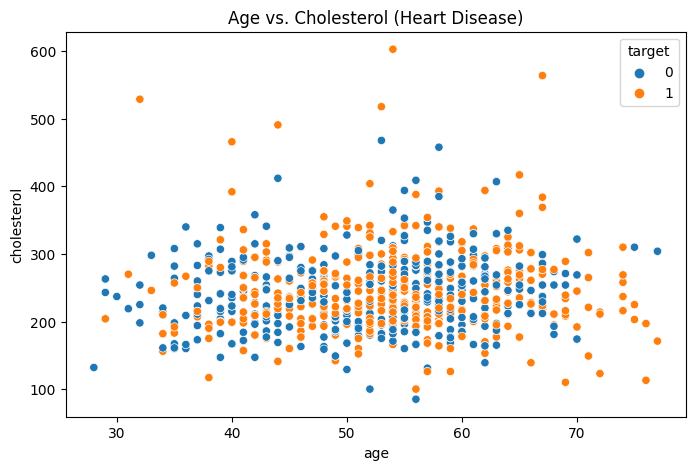

In [67]:
# Scatter plot of age vs. cholesterol (adapt to interesting variables)

plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='cholesterol', hue='target', data=df_unique) 
plt.title("Age vs. Cholesterol (Heart Disease)")
plt.show() 

Predict using Linear Regression

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


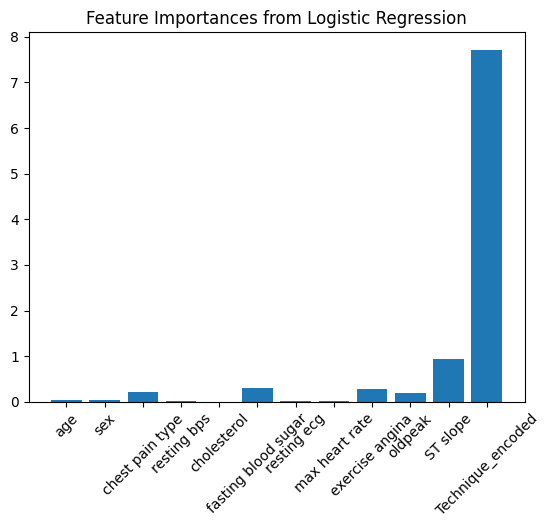

In [82]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have features in 'X' and the target in 'y'
X = df_unique.drop('target', axis=1)
y = df_unique['target']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get coefficients and feature importance
coefficients = model.coef_[0] 
feature_importances = abs(coefficients)

# Visualize
plt.bar(X.columns, feature_importances)  # Use 'X.columns' for feature names
plt.xticks(rotation=45)
plt.title("Feature Importances from Logistic Regression")
plt.show()

In [84]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Assuming your target column is named 'target'
y_true = df_unique['target']
y_pred = model.predict(df_unique.drop('target', axis=1)) # Adapt if your features are in a different arrangement

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Access the elements
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(cm) 

[[528   0]
 [  0 520]]


In [85]:
# True Negatives (TN)

TN

528

In [86]:
# False Positives (FP)

FP

0

In [87]:
# False Negatives (FN)

FN

0

In [88]:
# True Positives (TP)

TP

520

Heart diseases model correctly identified 520 cases of patients who truly have heart diseases. This indicates that this is doing a good job at detecting the disease in those who actually have it.